In [1]:
"""
Imports
"""

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF

torch.set_float32_matmul_precision('medium')

# Test DataModule

## Setup DataModule

In [2]:
from train import MNISTDataModule

transform = T.Compose([
    T.Normalize([0.5], [0.5]),
])

dm = MNISTDataModule(
    train_transform=transform,
    test_transform=transform
)

In [3]:
dm.setup(stage='fit')

Total Dataset       : 42000 samples
Train Dataset       : 37000 samples
Validation Dataset  : 5000 samples


## Check Dataset

In [4]:
label, img = dm.train_dataset[2]

In [5]:
pil_img = TF.to_pil_image(img)
pil_img

In [6]:
label

tensor(2)

## Resize Proportionally

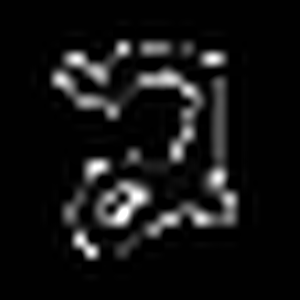

In [7]:
from PIL import Image

base_width = 300
wpercent = (base_width / float(pil_img.size[0]))
hsize = int((float(pil_img.size[1]) * float(wpercent)))
pil_img = pil_img.resize((base_width, hsize), Image.Resampling.LANCZOS)
pil_img

## Check Dataloader 

In [8]:
dl = dm.train_dataloader()

In [9]:
x = next(iter(dl))

In [10]:
x[0].shape, x[1].shape

(torch.Size([256]), torch.Size([256, 1, 28, 28]))